# Cross-shore transport

## First import some necessary packages

In [1]:
import logging
import pathlib
import sys
import warnings

import colorcet as cc
import dotenv
import geopandas as gpd
import holoviews as hv
import hvplot.pandas  # noqa: API import
import numpy as np
import pandas as pd
import panel as pn
import pooch

from bokeh.models import PanTool, WheelZoomTool, HoverTool
from bokeh.resources import INLINE
import bokeh.io

import coastal_dynamics as cd

# Activate Panel extension to make interactive visualizations
pn.extension()

In [2]:
# # Read questions from cloud storage
questions = cd.read_questions(
    # "./6_cross_shore_transport.json"
    "az://coastal-dynamics/questions/6_cross_shore_transport_hashed.json",
    storage_options={"account_name": "coclico"},
)

## (Cross-shore) sediment transport
Welcome to the notebook of week 6! The main topic of this notebook is cross-shore sediment transport (chapter 7 of the book, with some extra attention for section 7.5 specifically). We will start with a small introduction, followed by a more detailed look into figure 7.21 from the book.

## Introduction
Remember from chapter 5 that the velocity $u$ close to the bed can be assumed to consist of a wave group-averaged component $\bar{u}$, a short-wave-averaged oscillatory component $u_{lo}$ and a short-wave oscillatory component $u_{hi}$:
$$
u = \bar{u} + u_{lo} + u_{hi}
$$
We are interested in the time-averaged sediment transport. We have used the third odd velocity moment as a proxy for the bed load transport and the fourth odd velocity moment as a proxy for suspended load transport. If $\bar{u} \ll u_{lo} \ll u_{hi}$, the three most important terms in the third odd velocity moment are:
$$
\left\langle u \left|u\right|^2\right\rangle = 3 \left\langle \bar{u} \left|u_{hi}\right|^2\right\rangle + \left\langle u_{hi} \left|u_{hi}\right|^2\right\rangle + 3 \left\langle u_{lo} \left|u_{hi}\right|^2\right\rangle + ...
$$
Each of these terms is fully explained in the book (so you should definitely read up on this), but in short, each of these terms refers to the following process:
* $3 \left\langle \bar{u} \left|u_{hi}\right|^2\right\rangle$ : sediment stirred up by short waves and transported by the mean current
* $\left\langle u_{hi} \left|u_{hi}\right|^2\right\rangle$ :  sediment stirred up by short waves and transported by the high-frequency waves
* $3 \left\langle u_{lo} \left|u_{hi}\right|^2\right\rangle$ : sediment stirred up by short waves and transported by the low-frequency waves 

Each of the velocity moments can be directly measured in a flume or computed, or a combination of the two, which is what Roelvink and Stive (1989) did to obtain the results of Figure 7.21 in the book. In quite some quasi-steady sediment transport formulations, one can recognize the velocity moments. For instance, have a look at Eqs. 6.48a and 6.48b in the textbook. 

It is possible to derive an equilibrium profile mathematically by balancing onshore and offshore terms. Bowen (1980) does this analytically for the middle and lower shoreface by balancing onshore transport by short waves and offshore transport by gravity.

For the present exercise, we are interested in Figure 7.21 and how it changes for different wave conditions and bathymetry. However, we are limited by the lack of direct observations. [Tinker et al (2009)](https://doi.org/10.1016/j.csr.2009.03.011) present a solution. They performed a large number of suspended transport measurements close to the bed (in the bottom 15 cm) and fitted a shape function for transport due to both mean and oscillatory flow in the surf/shoaling zone. In addition, they determined shape functions for onshore and offshore transport in the swash/inner surf zone. Though the paper is very interesting (and we definitely recommend checking it out), you are not required to know it for this exercise and for Coastal Systems. You will hear more about it in the Coastal module as well, should you choose it!

Before getting into the Tinker shape functions, let's first have a look at Figure 7.21 from the book. As said, we use the velocity moments as a proxy for sediment transport. The total transport can then be seen to consist of multiple gross contributions. For instance, the upper panel of Figure 7.21 gives the total third odd moment as well its three components given by the right-hand side of the above equation. 


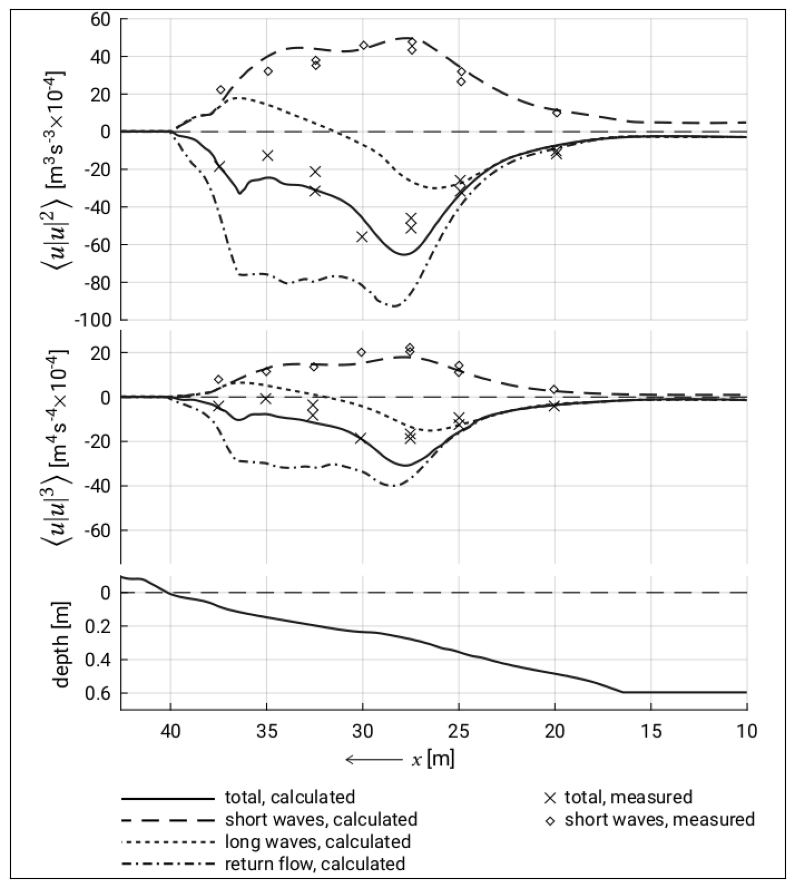

In [3]:
fp = pooch.retrieve(
    "https://coclico.blob.core.windows.net/coastal-dynamics/6_cross_shore_transport/6_fig720.png",
    known_hash="63ead6e943fd3c3ff0c52ec9370ffa23f0f0052c2912a3fa4ddad8dd30edcc47",
)

from matplotlib import pyplot as plt
from matplotlib import image as mpimg

plt.figure(figsize=(10, 20))

image = mpimg.imread(fp)
fig = plt.imshow(image)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

plt.show()

Using this figure, try to answer the questions below.

In [4]:
q1 = cd.QuestionFactory(questions["Q6-1"]).serve()
q2 = cd.QuestionFactory(questions["Q6-2"]).serve()
q3 = cd.QuestionFactory(questions["Q6-3"]).serve()
q4 = cd.QuestionFactory(questions["Q6-4"]).serve()
q5 = cd.QuestionFactory(questions["Q6-5"]).serve()
q6 = cd.QuestionFactory(questions["Q6-6"]).serve()
q7 = cd.QuestionFactory(questions["Q6-7"]).serve()

pn.Column(q1, q2, q3, q4, q5, q6, q7)

Column
    [0] Column
        [0] StaticText(name='Q6-1', value='What is the d...)
        [1] RadioBoxGroup(name='Options', options=['offshore', 'onshore', ...], value='offshore')
        [2] Button(name='Submit')
        [3] StaticText()
    [1] Column
        [0] StaticText(name='Q6-2', value='What is the d...)
        [1] RadioBoxGroup(name='Options', options=['offshore', 'onshore', ...], value='offshore')
        [2] Button(name='Submit')
        [3] StaticText()
    [2] Column
        [0] StaticText(name='Q6-3', value='What is the d...)
        [1] RadioBoxGroup(name='Options', options=['offshore', 'onshore', ...], value='offshore')
        [2] Button(name='Submit')
        [3] StaticText()
    [3] Column
        [0] StaticText(name='Q6-4', value='What is the d...)
        [1] RadioBoxGroup(name='Options', options=['offshore', 'onshore', ...], value='offshore')
        [2] Button(name='Submit')
        [3] StaticText()
    [4] Column
        [0] StaticText(name='Q6-5', value='Make an estimate f...)
        [1] RadioBoxGroup(name='Options', options=['0-5 m', '5-10 m', ...], value='0-5 m')
        [2] Button(name='Submit')
        [3] StaticText()
    [5] Column
        [0] StaticText(name='Q6-6', value='For what conditions i...)
        [1] RadioBoxGroup(name='Options', options=['storm conditions', ...], value='storm conditions')
        [2] Button(name='Submit')
        [3] StaticText()
    [6] Column
        [0] StaticText(name='Q6-7', value='What morphological r...)
        [1] CheckBoxGroup(name='Options', options=['erosion higher in the pr...])
        [2] Button(name='Submit')
        [3] StaticText()

## Define shape functions
Below the shape functions by [Tinker et al (2009)](https://doi.org/10.1016/j.csr.2009.03.011) are defined. These shape functions define transport as positive in onshore direction. They differentiate between transport in the surf/shoaling zone, and the swash/(inner) surf zone. Transport in the surf/shoaling zone was separated in a mean and oscillatory transport (or flux), and transport in the swash/surf zone in an onshore and offshore component. This means that in the surf/shoaling zone, both high- and low-frequency waves are combined in the 'oscillatory' component. You should be familiar with the concept of mean transport (as a result of undertow) and oscillatory transport (resulting from high- and low-frequency waves) in the shoaling and surf zone. The main difference with Figure 7.21 from the book is that long and short waves are not considered separately by Tinker et al.

However, the onshore and offshore transport for the swash/inner surf zone are newly introduced here. The transport in the swash zone can be quite important, but it is not easy to model and it is therefore not always taken into account in models. Also, the study of Roelvink and Stive (figure 7.21) did not take the swash zone into account. The swash transport is also outside the scope of Coastal Systems. 

By definition, the onshore transport component of the swash /inner surf zone is always positive (i.e. onshore), whereas the offshore transport component is always negative. The onshore transport occurs under all conditions and is confined to very shallow water, whereas the offshore component only occurs during high-energy conditions and takes place a bit further offshore in the inner surf zone (but still in the swash/inner surf zone). Herewith, During high-energy conditions, the offshore transport function helps explain rapid erosion in the outer swash/inner surf zone during high-energy conditions, by pulling the offshore transport maximum shorewards.

Furthermore, these shape functions represent suspended sediment transport only. Measurements were made at various heights above the bed (in the bottom 15 cm). The measurements by Tinker et al. were done at Sennen Cove, Cornwall, UK. For some context, the mean spring tidal range (MSTR) at this site is 5.3 m, which makes this a macrotidal system. The average significant wave height is 1.4 m, and the median grain size is 0.7 mm. This is quite coarse sediment (when compared to for instance the Dutch coast), so we can expect a quite steep bed profile. This bed profile is discussed further below.

**Note:** You are not expected to know or remember these equations, they are just here to help us with the exercise.

In [5]:
# Shape functions for the surf/shoal zone

def Tinker_mean(h, h_b):
    return (-120 * h_b**2) * (h / h_b)**4.3 * np.exp(-9.4 * (h / h_b)**0.75)

def Tinker_osci(h, h_b):
    return (2.75 * h_b**0.6) * (h / h_b)**3.5 * np.exp(-4.2 * (h / h_b)**1.05)

def Tinker_surf_shoal(h, h_b):
    return Tinker_mean(h, h_b) + Tinker_osci(h, h_b)

# Shape functions for the swash/surf zone

def Tinker_onsh(h, h_b):
    return 3.5 * h_b**1.9 * (h / h_b)**1.1 * np.exp(-31 * (h / h_b)**1.1)**(h_b**1.1)

def Tinker_offs(h, h_b):
    
    if h_b > 2.15:
        a_off = -3 * h_b + 4
    elif h_b <= 0.75:
        a_off = 0
    else:
        a_off = -1.25 * (h_b - 0.75)**2
        
    return a_off * h_b**1.1 * (h / h_b)**1.1 * np.exp(-5.7 * (h/h_b)**1.1)**(h_b**1.1)

def Tinker_swash_surf(h, h_b):
    return Tinker_onsh(h, h_b) + Tinker_offs(h, h_b)

# Total transport for swash/surf/shoal

def Tinker_total(h, h_b):
    return Tinker_surf_shoal(h, h_b) + Tinker_swash_surf(h, h_b)


Let's start with just looking at the surf/shoaling zone. As you can see the shape functions depend on the local water depth $h$ and on the water depth at breaking $h_b$. The larger $h_b$, the more energetic the waves. Remember that in notebook 3c you have determined $h_b$ as part of the calculation of the cross-shore distribution of the wave heights in the shoaling zone and surf zone.

Let's try these functions for different types of bathymetry, assuming some breakpoint depth $h_b$! 


### Define bathymetry functions
The functions below define the bathymetry. Two different bathymetries are defined. The first is used by Tinker et al. (2009) to define their shape functions. As mentioned, this is the bathymetry at Sennen Cove, Cornwall, UK. The second bathymetry is the bathymetry shown in Figure 7.21 in the book. Roelvink and Stive (1989) used this bathymetry for small-scale flume experiments performed at Delft Hydraulics (now Deltares). We will also use parabolic profiles, as in Figure 7.8 in the book. They will be defined in the plot function.


In [6]:
# Bathymetries here!

fp_uk = pooch.retrieve(
    "https://coclico.blob.core.windows.net/coastal-dynamics/6_cross_shore_transport/6_uk_bath.csv",
    known_hash="3082b3a6e968f95dc21a73006903aede461921265a352fc65b3797ec5bfb9ae1",
)

fp_nl = pooch.retrieve(
    "https://coclico.blob.core.windows.net/coastal-dynamics/6_cross_shore_transport/6_nl_bath.csv",
    known_hash="d0e7ac1c959c04aef0848fea685347280a170b39239c8510b234dfec80c8867e",
)

uk_bath = pd.read_csv(fp_uk, sep='; ', decimal=',', names=['x', 'y'], engine='python')
nl_bath = pd.read_csv(fp_nl, sep='; ', decimal=',', names=['x', 'y'], engine='python')

def bath(loc):
    if loc == "Sennen Cove, Cornwall (UK)":
        return uk_bath
    elif loc == "Scheldt flume (NL)":
        return nl_bath
    else:
        print("Choose either 'Sennen Cove, Cornwall (UK)' or 'Scheldt flume (NL)'")

### Define plot function

**Note**: Although you don't have to understand the plot method, we include it here so you can see how these interactive plots are made!

In [7]:
def show_transport(plot_where="pop-out"):
    """
    change value of 'plot_where' to:
    'inline' if you would like the plot to show in the notebook
    'pop-out' if you would like the plot to show in a new tab (i.e. seperate window)
    """

    sush_title = pn.pane.Markdown("#### Surf/shoal zone", styles={"color": "black"}, height=25)
    swsu_title = pn.pane.Markdown("#### Swash/surf zone", styles={"color": "black"}, height=25)
    tota_title = pn.pane.Markdown("#### All zones", styles={"color": "black"}, height=25)

    hb_slider = pn.widgets.FloatSlider(name="Breaker depth [m]:", start=0.05, end=3, step=0.05, value=0.8)

    wl_slider = pn.widgets.FloatSlider(name="Water Level [m] (relative to reference):", start=-2, end=2, step=0.05, value=0)

    A_input = pn.widgets.FloatInput(name="A (Parabolic profile):", value=0.043)
    m_input = pn.widgets.FloatInput(name="m (Parabolic profile):", value=0.773)

    bath_dropdown =  pn.widgets.Select(name="Bathymetry select:", options=["Sennen Cove, Cornwall (UK)", "Scheldt flume (NL)", "Parabolic profile (A, m)"], value="Sennen Cove, Cornwall (UK)")

    mean_switch = pn.widgets.Checkbox(name="Mean transport (surf / shoaling zone)", value=True)
    osci_switch = pn.widgets.Checkbox(name="Oscillatory transport (surf / shoaling zone)", value=True)
    sush_switch = pn.widgets.Checkbox(name="Total transport (surf / shoaling zone)", value=False)
    
    onsh_switch = pn.widgets.Checkbox(name="Onshore transport (swash / surf zone)", value=False)
    offs_switch = pn.widgets.Checkbox(name="Offshore transport (swash / surf zone)", value=False)
    swsu_switch = pn.widgets.Checkbox(name="Total transport (swash / surf zone)", value=False)

    tota_switch = pn.widgets.Checkbox(name="Total transport (all)", value=False)

    @pn.depends(wl_slider.param.value, 
                hb_slider.param.value, 
                bath_dropdown.param.value,
                A_input.param.value, 
                m_input.param.value,
                mean_switch.param.value,
                osci_switch.param.value,
                sush_switch.param.value,
                onsh_switch.param.value,
                offs_switch.param.value,
                swsu_switch.param.value,
                tota_switch.param.value
               )
    def plot(wl, h_b, loc, A, m,
             include_mean, include_osci, include_sush, include_onsh, include_offs, include_swsu, include_tota):
        if loc in ["Sennen Cove, Cornwall (UK)", "Scheldt flume (NL)",]:
            df = bath(loc)
            x = df.x
            y = df.y

        elif loc in ["Parabolic profile (A, m)"]:
            x = np.linspace(0, 1000, 500)
            y = -A * x**m
            
        else:
            print("Choose either 'Sennen Cove, Cornwall (UK)', 'Scheldt flume (NL)', or 'Parabolic profile (A, m)'")
        
        h = np.maximum(np.zeros(y.shape), wl - y)

        x_b = x[np.argmin(np.abs(h - h_b))]
        
        
        bath_plot = (hv.Curve((x, y), label='Bathymetry').opts(xlabel='x [m]', ylabel='z [m]', color='black') * \
                    hv.HLine(wl, label='water level').opts(line_dash='dashed') * \
                    hv.VLine(x_b, label='location of breaking').opts(line_dash='dashed', color='grey')).opts(title='Bathymetry')

        curve_transport = hv.Curve(([],[]))
        curve_h_hb = hv.Curve(([],[]))

        if include_mean:
            mean_transport = Tinker_mean(h, h_b)
            curve_transport *= hv.Curve((x, mean_transport), label='mean transport').opts(color='crimson')
            curve_h_hb *= hv.Curve((np.linspace(0, 6, 500)/h_b, Tinker_mean(np.linspace(0, 6, 500), h_b)), label='mean transport').opts(color='crimson')

        if include_osci:
            osci_transport = Tinker_osci(h, h_b)
            curve_transport *= hv.Curve((x, osci_transport), label='oscillatory transport').opts(color='orange')
            curve_h_hb *= hv.Curve((np.linspace(0, 6, 500)/h_b, Tinker_osci(np.linspace(0, 6, 500), h_b)), label='oscillatory transport').opts(color='orange')

        if include_sush:
            sush_transport = Tinker_surf_shoal(h, h_b)
            curve_transport *= hv.Curve((x, sush_transport), label='Total transport (surf/shoal)').opts(color='#aea04b')
            curve_h_hb *= hv.Curve((np.linspace(0, 6, 500)/h_b, Tinker_surf_shoal(np.linspace(0, 6, 500), h_b)), label='Total transport (surf/shoal)').opts(color='#aea04b')
            
        if include_onsh:
            onsh_transport = Tinker_onsh(h, h_b)
            curve_transport *= hv.Curve((x, onsh_transport), label='onshore transport').opts(color='green')
            curve_h_hb *= hv.Curve((np.linspace(0, 6, 500)/h_b, Tinker_onsh(np.linspace(0, 6, 500), h_b)), label='onshore transport').opts(color='green')

        if include_offs:
            offs_transport = Tinker_offs(h, h_b)
            curve_transport *= hv.Curve((x, offs_transport), label='offshore transport').opts(color='blue')
            curve_h_hb *= hv.Curve((np.linspace(0, 6, 500)/h_b, Tinker_offs(np.linspace(0, 6, 500), h_b)), label='offshore transport').opts(color='blue')

        if include_swsu:
            swsu_transport = Tinker_swash_surf(h, h_b)
            curve_transport *= hv.Curve((x, swsu_transport), label='Total transport (swash/surf)').opts(color='#FF00FF')
            curve_h_hb *= hv.Curve((np.linspace(0, 6, 500)/h_b, Tinker_swash_surf(np.linspace(0, 6, 500), h_b)), label='Total transport (swash/surf)').opts(color='#FF00FF')

        if include_tota:
            tota_transport = Tinker_total(h, h_b)
            curve_transport *= hv.Curve((x, tota_transport), label='Total transport (all)').opts(color='grey')
            curve_h_hb *= hv.Curve((np.linspace(0, 6, 500)/h_b, Tinker_total(np.linspace(0, 6, 500), h_b)), label='Total transport (all)').opts(color='grey')
        
        curve_transport *= hv.HLine(0).opts(color='black')
        curve_h_hb *=  hv.HLine(0).opts(color='black')

        transport_plot = curve_transport.opts(xlabel='x [m]', ylabel='Q [kg/m/s]', title='Transport (x)')
        h_hb_plot = curve_h_hb.opts(xlabel='h / h_b [-]', ylabel='Q [kg/m/s]', title='Transport (h/h_b)')
        
        p = (bath_plot.opts(
            height=200, width=1000, show_grid=True, active_tools=[], toolbar=None, legend_position='bottom_left') + \
         transport_plot.opts(
             height=250, width=1000, show_grid=True, active_tools=[], toolbar=None, legend_position='bottom_left').redim(y=hv.Dimension('Transport (x)', soft_range=(-0.1, 0.1))) + \
         h_hb_plot.opts(
             height=200, width=1000, show_grid=True, active_tools=[], toolbar=None, legend_position='bottom_right').redim(x=hv.Dimension('h / h_b [-]', range=(0, 2)), y=hv.Dimension('Transport (h /h_b)', soft_range=(-0.1, 0.1)))
            ).opts(shared_axes=False).cols(1)

        return p

    app = pn.Column(
        pn.Row(bath_dropdown, pn.Column(wl_slider, hb_slider), pn.Column(A_input, m_input), align='center'),
        pn.Row(pn.Column(sush_title, mean_switch, osci_switch, sush_switch), 
               pn.Column(swsu_title, onsh_switch, offs_switch, swsu_switch),
               pn.Column(tota_title, tota_switch), align='center'), 
        pn.Row(plot, align='center')
    )
    
    if plot_where == "inline":
        return app
    elif plot_where == "pop-out":
        app.show()
    else:
        print("please use either inline or pop-out for the plot_where variable")

### Now plot the results

Execute the cell below to generate the plot by using the function we defined above. Please note that altering the slider positions or selecting different options from the dropdown menus may trigger a warning; it can safely be ignored, and possibly silenced by adjusting the logging warning level. 

In [8]:
warnings.filterwarnings("ignore")
logging.getLogger().setLevel(logging.ERROR)

show_transport(plot_where="pop-out")

Launching server at http://localhost:49713


You can select the bathymetry you want to look at using the selector in the panel. Use the sliders to change the water level and breaker depth (plotted as a horizontal dashed blue and a vertical grey line respectively). Finally, you can choose to whether include certain transport components in the transport plot or not. By default, only the mean transport and the oscillatory transport are included. For now, let's keep it that way. Using this plot, try to answer the questions below.

In [9]:
q8 = cd.QuestionFactory(questions["Q6-8"]).serve()

pn.Column(q8)

Column
    [0] Column
        [0] StaticText(name='Q6-8', value='The unit of t...)
        [1] RadioBoxGroup(name='Options', options=['We are considering sedim...], value='We are considering s...)
        [2] Button(name='Submit')
        [3] StaticText()

### Sennen cove, Cornwall
We will start by looking at the United Kingdom site where the measurements were done. The measurements were done over many tides (39) and for a range of wave conditions (offshore significant wave heights ranging from 0.1–2.5 m. Firstly, we will look at the more energetic conditions, which might occur during a storm. According to Tinker et al., a breaker depth of $h_b=2$ m is representative of such a situation. Use this value. 

For Sennen Cove, the reference level in the plot is MSL. Using the slider, you can set the water level relative to MSL, depending on the stage of the tide. First, play around with this slider. You should notice that for lower tidal water levels, not only the shoreline but also the breakpoint shifts in the offshore direction. This is a nice example of the effect of the tide on which part of the profile is under wave attack. 

You should also notice that for MSL, the breakpoint is just outside the measured profile (and its instrumentation for the velocity and concentration measurements). It even falls outside the considered profile for lower tide levels. Clearly, the coverage of measurements in the shoaling zone depended on the tide and wave conditions. Under high-energy conditions data beyond the breakpoint were limited. We must keep this in mind when interpreting the shape functions. 

Now set the water level to MSL +2 m (this is MHWS). We are now going to look at the transports along the profile (second panel and third panel). Note that the horizontal axis in the second panel is the same as for the profile. In the third panel, however, the transport is given as a function of $h/h_b$ (with $h/h_b = 1$ the breakpoint). 


In [10]:
q9 = cd.QuestionFactory(questions["Q6-9"]).serve()
q10 = cd.QuestionFactory(questions["Q6-10"]).serve()
q11 = cd.QuestionFactory(questions["Q6-11"]).serve()
q12 = cd.QuestionFactory(questions["Q6-12"]).serve()
q13 = cd.QuestionFactory(questions["Q6-13"]).serve()
q14 = cd.QuestionFactory(questions["Q6-14"]).serve()
q15 = cd.QuestionFactory(questions["Q6-15"]).serve()
q16 = cd.QuestionFactory(questions["Q6-16"]).serve()

pn.Column(q9, q10, q11, q12, q13, q14, q15, q16)

Column
    [0] Column
        [0] StaticText(name='Q6-9', value='How wide is the surf zone...)
        [1] FloatInput(name='Your Answer')
        [2] Button(name='Submit')
        [3] StaticText()
    [1] Column
        [0] StaticText(name='Q6-10', value='What is the d...)
        [1] RadioBoxGroup(name='Options', options=['onshore, onshore', ...], value='onshore, onshore')
        [2] Button(name='Submit')
        [3] StaticText()
    [2] Column
        [0] StaticText(name='Q6-11', value='Where do we s...)
        [1] RadioBoxGroup(name='Options', options=['In the shoaling zone and...], value='In the shoaling z...)
        [2] Button(name='Submit')
        [3] StaticText()
    [3] Column
        [0] StaticText(name='Q6-12', value='Where do we s...)
        [1] RadioBoxGroup(name='Options', options=['In the shoaling zone and...], value='In the shoaling z...)
        [2] Button(name='Submit')
        [3] StaticText()
    [4] Column
        [0] StaticText(name='Q6-13', value='For these high-energy con...)
        [1] RadioBoxGroup(name='Options', options=['Onshore for h/h_b < 1, ...], value='Onshore for h/h_b < 1, ...)
        [2] Button(name='Submit')
        [3] StaticText()
    [5] Column
        [0] StaticText(name='Q6-14', value='Compare the a...)
        [1] RadioBoxGroup(name='Options', options=['The offshore transport d...], value='The offshore t...)
        [2] Button(name='Submit')
        [3] StaticText()
    [6] Column
        [0] StaticText(name='Q6-15', value='What morphological r...)
        [1] CheckBoxGroup(name='Options', options=['erosion higher in the pr...])
        [2] Button(name='Submit')
        [3] StaticText()
    [7] Column
        [0] StaticText(name='Q6-16', value='Now look at the shoaling ...)
        [1] RadioBoxGroup(name='Options', options=['Erosion seaward of the b...], value='Erosion seaward o...)
        [2] Button(name='Submit')
        [3] StaticText()

Let's summarize some of our findings for the high-energy conditions. We see an offshore mean transport due to undertow in the surf zone (and a little bit outside) and an onshore oscillatory transport in the shoaling zone and surf zone. This gives a total transport with an offshore maximum in the surf zone and an onshore maximum near the breakpoint (just outside the breakpoint). These maxima separate the regions of accretion and erosion. The largest changes are in the surf zone, where sediment is moved from higher to lower portions of the profile. But sediment is also brought from the shoaling zone to the accretion zone in the outer part of the surf zone.  

Now we continue with looking at low-energy conditions for Sennen Cove, which according to Tinker et al. is represented by a breaking depth $h_b=0.6$ m. Change the value of $h_b$ in the plot to 0.6 m, and try to answer the questions below. For ease of comparison, set the water level again to MSL +2 m (this is MHWS).  

In [11]:
q17 = cd.QuestionFactory(questions["Q6-17"]).serve()
q18 = cd.QuestionFactory(questions["Q6-18"]).serve()
q19 = cd.QuestionFactory(questions["Q6-19"]).serve()
q20 = cd.QuestionFactory(questions["Q6-20"]).serve()

pn.Column(q17, q18, q19, q20)

Column
    [0] Column
        [0] StaticText(name='Q6-17', value='How wide is the surf zone...)
        [1] FloatInput(name='Your Answer')
        [2] Button(name='Submit')
        [3] StaticText()
    [1] Column
        [0] StaticText(name='Q6-18', value='What is the d...)
        [1] RadioBoxGroup(name='Options', options=['onshore in the shoaling ...], value='onshore in the shoaling z...)
        [2] Button(name='Submit')
        [3] StaticText()
    [2] Column
        [0] StaticText(name='Q6-19', value='The correct a...)
        [1] CheckBoxGroup(name='Options', options=['The mean and oscillatory...])
        [2] Button(name='Submit')
        [3] StaticText()
    [3] Column
        [0] StaticText(name='Q6-20', value='We have seen t...)
        [1] CheckBoxGroup(name='Options', options=['sedimentation shoreward ...])
        [2] Button(name='Submit')
        [3] StaticText()

We have seen that for the low-energy conditions, the surf zone is very narrow. As a consequence, the instruments were not in the surf zone for a very long time, resulting in little data from this region. This introduces some uncertainty in the resulting shape functions.

It is a nice additional exercise to now select the Scheldt flume profile and see how the shape functions behave for the situation as in Figure 7.21. Set the water level slider at the reference level and choose the $h_b$, such that it gives you the surf zone width that you estimated in Q5 above.  What do you learn from this comparison? Because the Scheldt flume is a small-scale facility and not at full size, the value for $h_b$ is very small (≈ 0.3 m). In real life such a value for $h_b$ would represent accretive conditions conditions and the shape functions do indeed give a consistent onshore transport. In the Scheldt flume, however, these waves mimic storm conditions.

A key feature of the two shape functions is that both the mean and oscillatory sediment ﬂuxes increase with $h_b$, but that the offshore-directed mean ﬂux increases faster than the onshore-directed oscillatory ﬂux. For small $h_b$, the net transport is onshore regardless of $h/h_b$. For  larger $h_b$, the transport has an offshore transport peak in the surf zone and an onshore transport peak close to the breakpoint. Use the $h_b$ slider to verify these conclusions. When you have done so, try to answer the following question: 

In [12]:
q21 = cd.QuestionFactory(questions["Q6-21"]).serve()

pn.Column(q21)

Column
    [0] Column
        [0] StaticText(name='Q6-21', value='Consider the t...)
        [1] RadioBoxGroup(name='Options', options=['approx. 0.7 m', ...], value='approx. 0.7 m')
        [2] Button(name='Submit')
        [3] StaticText()

By now, you have explored the main concepts of cross-shore sediment transport employing the shape functions by Tinker et al. The 
low-energy shape function can lead to the development of the typical summer/calm proﬁle and drive onshore bar migration. The high-energy shape function can lead to the development of the typical winter/storm proﬁle and drive offshore bar migration.

If you are curious, you can optionally continue to explore some additional features that we built in this notebook.

### Parabolic profile

The shape functions from Tinker et al. were developed for the UK site. Nonetheless, the authors assume that the shape functions are generally applicable to sandy beaches with alongshore uniform topography. To make them work on a barred beach, some adjustments must be made.

Let's check how they perform for any other cross-shore profile. For this, we have included the option for a parabolic coastal profile. You can select the parabolic coastal profile using the dropdown menu in the plot and set the two parameters A and m using the sliders. In this way, you can study the difference between the three Dutch profiles of Figure 7.8 in the book. No questions will be asked about this here.


### Transport in the swash zone

Including the on- and offshore transport shape functions allows us to look at what happens in the swash and the inner surf zone. Enable these functions in the plot to explore the effect of including the transport in the swash / inner surf zone.

### ($h / h_b$)-plot
As you will have noticed by now, the plotting function generates three subplots: the bathymetry, the transport as a function of x, and the transport as a function of $h/h_b$. The dimensionless $h/h_b$ is a convenient way to normalize cross-shore profiles, to see where accretion/erosion might occur. Below, a new plotting method is defined to look at this manner of plotting more closely.

**Note**: Although you don't have to understand the plot method, we include it here so you can see how these interactive plots are made!

In [13]:
def h_hb_transport(plot_where="pop-out"):
    """
    change value of 'plot_where' to:
    'inline' if you would like the plot to show in the notebook
    'pop-out' if you would like the plot to show in a new tab (i.e. seperate window)
    """
    sush_title = pn.pane.Markdown("#### Surf/shoal zone", styles={"color": "black"}, height=25)
    swsu_title = pn.pane.Markdown("#### Swash/surf zone", styles={"color": "black"}, height=25)
    tota_title = pn.pane.Markdown("#### All zones", styles={"color": "black"}, height=25)
    
    hb_slider = pn.widgets.RangeSlider(name="Range of hb [m] values to plot", start=0, end=2.5, value=(0, 2.5))

    mean_switch = pn.widgets.Checkbox(name="Mean transport (surf / shoaling zone)", value=True)
    osci_switch = pn.widgets.Checkbox(name="Oscillatory transport (surf / shoaling zone)", value=True)
    sush_switch = pn.widgets.Checkbox(name="Total transport (surf / shoaling zone)", value=False)
    
    onsh_switch = pn.widgets.Checkbox(name="Onshore transport (swash / surf zone)", value=False)
    offs_switch = pn.widgets.Checkbox(name="Offshore transport (swash / surf zone)", value=False)
    swsu_switch = pn.widgets.Checkbox(name="Total transport (swash / surf zone)", value=False)

    tota_switch = pn.widgets.Checkbox(name="Total transport (all)")

    @pn.depends(hb_slider.param.value, 
                mean_switch.param.value,
                osci_switch.param.value,
                sush_switch.param.value,
                onsh_switch.param.value,
                offs_switch.param.value,
                swsu_switch.param.value,
                tota_switch.param.value
               )
    def plot(h_b,
             include_mean, include_osci, include_sush, include_onsh, include_offs, include_swsu, include_tota):

        hb1 = h_b[0]
        hb4 = h_b[1]
        hb2 = (hb4-hb1) * 1/3 + hb1
        hb3 = (hb4-hb1) * 2/3 + hb1

        curve_transport1 = hv.Curve(([],[]))
        curve_transport2 = hv.Curve(([],[]))
        curve_transport3 = hv.Curve(([],[]))
        curve_transport4 = hv.Curve(([],[]))

        h = np.linspace(0, 5, 500)

        if include_mean:
            curve_transport1 *= hv.Curve((h/hb1, Tinker_mean(h, hb1)), label='mean transport').opts(color='crimson')
            curve_transport2 *= hv.Curve((h/hb2, Tinker_mean(h, hb2)), label='mean transport').opts(color='crimson')
            curve_transport3 *= hv.Curve((h/hb3, Tinker_mean(h, hb3)), label='mean transport').opts(color='crimson')
            curve_transport4 *= hv.Curve((h/hb4, Tinker_mean(h, hb4)), label='mean transport').opts(color='crimson')

        if include_osci:
            curve_transport1 *= hv.Curve((h/hb1, Tinker_osci(h, hb1)), label='oscillatory transport').opts(color='orange')
            curve_transport2 *= hv.Curve((h/hb2, Tinker_osci(h, hb2)), label='oscillatory transport').opts(color='orange')
            curve_transport3 *= hv.Curve((h/hb3, Tinker_osci(h, hb3)), label='oscillatory transport').opts(color='orange')
            curve_transport4 *= hv.Curve((h/hb4, Tinker_osci(h, hb4)), label='oscillatory transport').opts(color='orange')

        if include_sush:
            curve_transport1 *= hv.Curve((h/hb1, Tinker_surf_shoal(h, hb1)), label='Total transport (surf/shoal)').opts(color='#aea04b')
            curve_transport2 *= hv.Curve((h/hb2, Tinker_surf_shoal(h, hb2)), label='Total transport (surf/shoal)').opts(color='#aea04b')
            curve_transport3 *= hv.Curve((h/hb3, Tinker_surf_shoal(h, hb3)), label='Total transport (surf/shoal)').opts(color='#aea04b')
            curve_transport4 *= hv.Curve((h/hb4, Tinker_surf_shoal(h, hb4)), label='Total transport (surf/shoal)').opts(color='#aea04b')

        if include_onsh:
            curve_transport1 *= hv.Curve((h/hb1, Tinker_onsh(h, hb1)), label='onshore transport').opts(color='green')
            curve_transport2 *= hv.Curve((h/hb2, Tinker_onsh(h, hb2)), label='onshore transport').opts(color='green')
            curve_transport3 *= hv.Curve((h/hb3, Tinker_onsh(h, hb3)), label='onshore transport').opts(color='green')
            curve_transport4 *= hv.Curve((h/hb4, Tinker_onsh(h, hb4)), label='onshore transport').opts(color='green')

        if include_offs:
            curve_transport1 *= hv.Curve((h/hb1, Tinker_offs(h, hb1)), label='offshore transport').opts(color='blue')
            curve_transport2 *= hv.Curve((h/hb2, Tinker_offs(h, hb2)), label='offshore transport').opts(color='blue')
            curve_transport3 *= hv.Curve((h/hb3, Tinker_offs(h, hb3)), label='offshore transport').opts(color='blue')
            curve_transport4 *= hv.Curve((h/hb4, Tinker_offs(h, hb4)), label='offshore transport').opts(color='blue')

        if include_swsu:
            curve_transport1 *= hv.Curve((h/hb1, Tinker_swash_surf(h, hb1)), label='Total transport (swash/surf)').opts(color='#FF00FF')
            curve_transport2 *= hv.Curve((h/hb2, Tinker_swash_surf(h, hb2)), label='Total transport (swash/surf)').opts(color='#FF00FF')
            curve_transport3 *= hv.Curve((h/hb3, Tinker_swash_surf(h, hb3)), label='Total transport (swash/surf)').opts(color='#FF00FF')
            curve_transport4 *= hv.Curve((h/hb4, Tinker_swash_surf(h, hb4)), label='Total transport (swash/surf)').opts(color='#FF00FF')

        if include_tota:
            curve_transport1 *= hv.Curve((h/hb1, Tinker_total(h, hb1)), label='Total transport (all)').opts(color='grey')
            curve_transport2 *= hv.Curve((h/hb2, Tinker_total(h, hb2)), label='Total transport (all)').opts(color='grey')
            curve_transport3 *= hv.Curve((h/hb3, Tinker_total(h, hb3)), label='Total transport (all)').opts(color='grey')
            curve_transport4 *= hv.Curve((h/hb4, Tinker_total(h, hb4)), label='Total transport (all)').opts(color='grey')
        
        curve_transport1 *= hv.HLine(0).opts(color='black')
        curve_transport2 *= hv.HLine(0).opts(color='black')
        curve_transport3 *= hv.HLine(0).opts(color='black')
        curve_transport4 *= hv.HLine(0).opts(color='black')

        transport_plot1 = curve_transport1.opts(xlabel='h / h_b [-]', ylabel='Q [kg/m/s]', title=f'Transport (hb={hb1:.1f})')
        transport_plot2 = curve_transport2.opts(xlabel='h / h_b [-]', ylabel='Q [kg/m/s]', title=f'Transport (hb={hb2:.1f})')
        transport_plot3 = curve_transport3.opts(xlabel='h / h_b [-]', ylabel='Q [kg/m/s]', title=f'Transport (hb={hb3:.1f})')
        transport_plot4 = curve_transport4.opts(xlabel='h / h_b [-]', ylabel='Q [kg/m/s]', title=f'Transport (hb={hb4:.1f})')

        p = (transport_plot4.opts(
                            height=175, width=1000, show_grid=True, active_tools=[], toolbar=None, legend_position='bottom_right').redim(
                            x=hv.Dimension('h / h_b [-]', range=(0, 2)), y=hv.Dimension('Transport (h /h_b)', soft_range=(-0.1, 0.1))) + \
            transport_plot3.opts(
                            height=175, width=1000, show_grid=True, active_tools=[], toolbar=None, legend_position='bottom_right').redim(
                            x=hv.Dimension('h / h_b [-]', range=(0, 2)), y=hv.Dimension('Transport (h /h_b)', soft_range=(-0.1, 0.1))) + \
            transport_plot2.opts(
                            height=175, width=1000, show_grid=True, active_tools=[], toolbar=None, legend_position='bottom_right').redim(
                            x=hv.Dimension('h / h_b [-]', range=(0, 2)), y=hv.Dimension('Transport (h /h_b)', soft_range=(-0.1, 0.1))) + \
            transport_plot1.opts(
                            height=175, width=1000, show_grid=True, active_tools=[], toolbar=None, legend_position='bottom_right').redim(
                            x=hv.Dimension('h / h_b [-]', range=(0, 2)), y=hv.Dimension('Transport (h /h_b)', soft_range=(-0.1, 0.1)))
            ).cols(1)

        return p

    app = pn.Column(
        pn.Row(hb_slider, align='center'),
        pn.Row(pn.Column(sush_title, mean_switch, osci_switch, sush_switch), 
               pn.Column(swsu_title, onsh_switch, offs_switch, swsu_switch),
               pn.Column(tota_title, tota_switch), align='center'), 
        pn.Row(plot, align='center')
    )
    
    if plot_where == "inline":
        return app
    elif plot_where == "pop-out":
        app.show()
    else:
        print("please use either inline or pop-out for the plot_where variable")

Execute the cell below to generate the plot by using the function we defined above. Please note that altering the slider positions or selecting different options from the dropdown menus may trigger a warning; it can safely be ignored, and possibly silenced by the adjusting the logging warning level. 

In [14]:
warnings.filterwarnings("ignore")
logging.getLogger().setLevel(logging.ERROR)

h_hb_transport(plot_where="pop-out")

Launching server at http://localhost:49714


Using this plot it is much easier to explore the effect of $h_b$. We will not ask any questions about this plot yet, but see if you can verify some of the key features of the shape functions. For this, you can have a look at the following pointers:
- both the mean and oscillatory sediment ﬂuxes increase with $h_b$.
- the offshore-directed mean ﬂux increases faster than the onshore-directed oscillatory ﬂux.
- for small $h_b$, the net transport is onshore regardless of $h/h_b$.
- for  larger $h_b$, the transport has an offshore transport peak in the surf zone and an onshore transport peak close to the breakpoint.
- the onshore and offshore net transport peaks are approximately equal in magnitude for $h_b$ = 1.7 m.
- the low-energy shape function can lead to the development of the typical summer/calm proﬁle and drive onshore bar migration.
- the high-energy shape function can lead to the development of the typical winter/storm proﬁle and drive offshore bar migration. 

You have reached the end of this notebook. You now know about the different components in the swash, surf, and shoaling zone, and have seen some practical examples! In ACES (the first unit of the B1 Coastal Engineering module) we will discuss the Tinker et al. paper further. 